In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.express as px
import ipywidgets as widgets
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')


In [2]:

#data = pd.read_csv("DATOS ADD_VISUALIZACION.CSV", decimal=',')
data = pd.read_csv("https://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_29092022.csv",sep=';', decimal=',')
data

,FECHA_PETICION,Año,LABORATORIO,REGION,CODIGO_REGION,PETICION,Identificador,SEXO,Adulto_Niño,MACROZONA,Estaciones_año,Edad,VITAMINA D,FOSFORO,CALCIO,CREATININA,COVID-19
0,02/01/2018 8:17,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,22.87,5.5,10.9,0.90,NaN
1,02/01/2018 8:18,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483181,"1,13E+13",F,Adulto,CENTRO,VERANO,33,15.04,NaN,NaN,NaN,NaN
2,02/01/2018 8:24,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,17.17,4.1,9.6,0.80,NaN
3,02/01/2018 8:32,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,14.44,4.3,9.6,0.60,NaN
4,02/01/2018 8:33,2018,LA SERENA,Región de Coquimbo,4,1483344,"1,19E+12",F,Adulto,NORTE,VERANO,52,15.52,NaN,NaN,0.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212521,31/12/2021 12:20,2021,SANTIAGO,Región Metropolitana de Santiago,13,6583559,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,41,6.62,NaN,NaN,NaN,NaN
212522,31/12/2021 12:35,2021,SANTIAGO,Región Metropolitana de Santiago,13,6583737,"1,18E+12",F,Adulto,CENTRO,PRIMAVERA,63,14.53,NaN,NaN,NaN,NaN
212523,31/12/2021 13:01,2021,SANTIAGO,Región Metropolitana de Santiago,13,6583960,"1,13E+13",M,Niño,CENTRO,PRIMAVERA,1,6.61,5.9,9.7,0.31,NaN
212524,31/12/2021 13:17,2021,SANTIAGO,Región Metropolitana de Santiago,13,6584013,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,45,18.50,NaN,NaN,NaN,NaN


In [3]:
data.columns = data.columns.str.upper()
data.head(5)

,FECHA_PETICION,AÑO,LABORATORIO,REGION,CODIGO_REGION,PETICION,IDENTIFICADOR,SEXO,ADULTO_NIÑO,MACROZONA,ESTACIONES_AÑO,EDAD,VITAMINA D,FOSFORO,CALCIO,CREATININA,COVID-19
0,02/01/2018 8:17,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,22.87,5.5,10.9,0.90,NaN
1,02/01/2018 8:18,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483181,"1,13E+13",F,Adulto,CENTRO,VERANO,33,15.04,NaN,NaN,NaN,NaN
2,02/01/2018 8:24,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,17.17,4.1,9.6,0.80,NaN
3,02/01/2018 8:32,2018,SANTIAGO,Región Metropolitana de Santiago,13,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,14.44,4.3,9.6,0.60,NaN
4,02/01/2018 8:33,2018,LA SERENA,Región de Coquimbo,4,1483344,"1,19E+12",F,Adulto,NORTE,VERANO,52,15.52,NaN,NaN,0.66,NaN


In [4]:
Grafico_estaciones=data[['AÑO','ESTACIONES_AÑO','VITAMINA D']]#list(Grafico_wpp)
Grafico_estaciones

,AÑO,ESTACIONES_AÑO,VITAMINA D
0,2018,VERANO,22.87
1,2018,VERANO,15.04
2,2018,VERANO,17.17
3,2018,VERANO,14.44
4,2018,VERANO,15.52
...,...,...,...
212521,2021,PRIMAVERA,6.62
212522,2021,PRIMAVERA,14.53
212523,2021,PRIMAVERA,6.61
212524,2021,PRIMAVERA,18.50


In [5]:
Grafico_estaciones=Grafico_estaciones.groupby(['AÑO','ESTACIONES_AÑO']).agg({'VITAMINA D':'mean'})

Grafico_estaciones=Grafico_estaciones.reset_index()
Grafico_estaciones

,AÑO,ESTACIONES_AÑO,VITAMINA D
0,2018,INVIERNO,16.286891
1,2018,OTOÑO,23.606977
2,2018,PRIMAVERA,19.313291
3,2018,VERANO,25.453591
4,2019,INVIERNO,20.838293
5,2019,OTOÑO,23.520736
6,2019,PRIMAVERA,23.607700
7,2019,VERANO,26.582004
8,2020,INVIERNO,18.778876
9,2020,OTOÑO,24.235388


In [6]:
CONDICIONES=[Grafico_estaciones['ESTACIONES_AÑO']=='VERANO',
             Grafico_estaciones['ESTACIONES_AÑO']=='OTOÑO',
             Grafico_estaciones['ESTACIONES_AÑO']=='INVIERNO',
             Grafico_estaciones['ESTACIONES_AÑO']=='PRIMAVERA'           
            ]
RESPUESTA=[1,2,3,4]
Grafico_estaciones['ESTACIONES_ORDEN']=np.select(CONDICIONES,RESPUESTA)
Grafico_estaciones

,AÑO,ESTACIONES_AÑO,VITAMINA D,ESTACIONES_ORDEN
0,2018,INVIERNO,16.286891,3
1,2018,OTOÑO,23.606977,2
2,2018,PRIMAVERA,19.313291,4
3,2018,VERANO,25.453591,1
4,2019,INVIERNO,20.838293,3
5,2019,OTOÑO,23.520736,2
6,2019,PRIMAVERA,23.607700,4
7,2019,VERANO,26.582004,1
8,2020,INVIERNO,18.778876,3
9,2020,OTOÑO,24.235388,2


In [7]:
Grafico_estaciones=Grafico_estaciones.sort_values(by=['AÑO','ESTACIONES_ORDEN'],ascending=[True,True])


In [8]:
Grafico_estaciones=Grafico_estaciones.loc[:,['AÑO','ESTACIONES_AÑO','VITAMINA D']]
Grafico_estaciones

,AÑO,ESTACIONES_AÑO,VITAMINA D
3,2018,VERANO,25.453591
1,2018,OTOÑO,23.606977
0,2018,INVIERNO,16.286891
2,2018,PRIMAVERA,19.313291
7,2019,VERANO,26.582004
5,2019,OTOÑO,23.520736
4,2019,INVIERNO,20.838293
6,2019,PRIMAVERA,23.607700
11,2020,VERANO,27.338614
9,2020,OTOÑO,24.235388


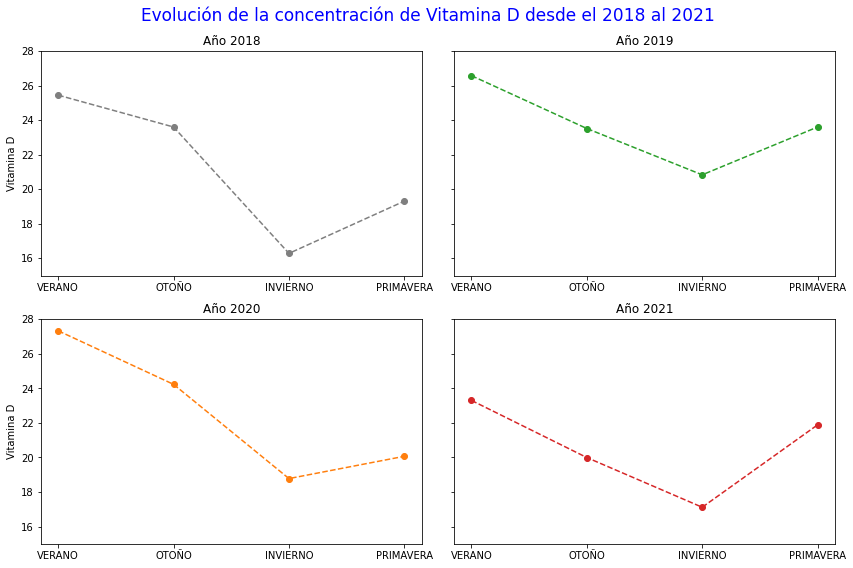

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
fig, ax = plt.subplots(2, 2,figsize=(12,8),sharey = True, constrained_layout=True, )
#a=np.linspace(0,10,10)
Estaciones = ['VERANO', 'OTOÑO', 'INVIERNO', 'PRIMAVERA']
Vitamina_D = {'2018':Grafico_estaciones.iloc[:4,2:], '2019':Grafico_estaciones.iloc[4:8,2:],
                '2020':Grafico_estaciones.iloc[8:12,2:], '2021':Grafico_estaciones.iloc[12:16,2:]}

ax[0,0].plot(Estaciones, Vitamina_D['2018'], color = 'tab:grey', marker='o', linestyle='dashed')
ax[0,1].plot(Estaciones, Vitamina_D['2019'], color = 'tab:green',marker='o',linestyle='dashed')
ax[1,0].plot(Estaciones, Vitamina_D['2020'], color = 'tab:orange',marker='o',linestyle='dashed')
ax[1,1].plot(Estaciones, Vitamina_D['2021'], color = 'tab:red',marker='o',linestyle='dashed')
ax[0,0].set_title("Año 2018")
ax[0,1].set_title("Año 2019")
ax[1,0].set_title("Año 2020")
ax[1,1].set_title("Año 2021")
#ax[0,0]annotate(EstacionesVitamina_D['2018']=(8, 0))
# ax.annotate("Sine", xy=(8, 0),
# xycoords='data', xytext=(10.5, 0),
# textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),)
#ax.set_xlim(0, 4)
#ax[0,0].xaxis.grid
ax[0,0].set_ylim(15, 28)
ax[0,0].set_ylabel('Vitamina D')
ax[1,0].set_ylabel('Vitamina D')
#ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
#ax.legend(loc = 'upper right')
plt.suptitle('Evolución de la concentración de Vitamina D desde el 2018 al 2021',fontsize=17, color='b')

#ax[0,0].grid()
fig.tight_layout()
plt.show()